# CMSE 202: Semester Group Project

<img src="https://as2.ftcdn.net/jpg/01/24/40/79/500_F_124407905_i8wEGGzf7YVSMkl3aNt0QPnUPe62T0j1.jpg" width=400px>

**Section:** 003

**Group Members and their assigned sections:** 
* Himali Bhandar:Model 
* Amanda Bowerman: Model
* Blake Stewart: Data
* Jalin Lewis: Results 
* Matthew Sitto: Data
* Riley Latham: Data
* Alexis Morse: Results


## Statement of the Problem

#### **How much, quantitatively, do the presidential election debates affect the outcome of a presidential election?**


## Solution


As a group, we have decided to investigate US Presidential debates' speeches from the years 2000 to 2016 and the actual effect of these speeches on the results of President Elections. 

To quantitatively use the speeches we found online, we decided to do Sentiment Analysis on these speeches. The goal for this step was to determine the words in these speeches which had positive and negative connotations associated with them. The total number of positive and negative words in each speech would be used for sentiment analysis later on.
We also collected data on these candidates' political party affiliations, election result, campaign spending, favorability rating (based off of the popular vote), and the voting-eligible population turnout for each election. 

For the modeling section of the project, we decided to a K-nearest Classifier Machine Learning model. We wanted this program to learn to associate the total number of positive and negative words and the result of election together and to determine if having either more positive or negative numbers would affect the result or not. 

After the analysis, we displayed our results using graphs and print statements. 

*Note: Most of the code applied in this notebook has been imported via python files. This was done because each section of the coding project was assigned to a few people in the group. We will be displaying some sample code and print statements in this notebook to show how our code generally worked. For more detailed understanding of the code, please refer to the python files submitted along with this notebook.* 

## Data

This section of the project notebook includes our method of collecting, cleaning, and processing our data through sentiment analyis techniques. We will begin with providing the process in which we collected presidential debate transcripts from the 2000-2016 elections. We then pulled all of the positive and negative sentiment from each candidate and used them as predictors for our classification algorithim on predicting if the candidate won the election. This data will be paired with control data such as candidate's favorability rating, political affiliation, campaign financials, and the voting-eligible population turnout for each election.

Below, we explain the logic behind the sentiment analysis we used for this project with some sample code.

*Note: The debate file that is being pulled into the next step, is just one of the debate files. The process below was repeated for all other debate text files that we had.*

In [1]:
# Import necessary python packages
import pandas as pd
import numpy as np
import nltk

# Expected to return a True Value
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/himalibhandari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Step 1: Import Speech Data

In [2]:
# Import debate transcript, positve and negative word dictionaries.txt files
# Read file and split each word into its own string

debate_path = input('Copy the path to the debate you\'re interested in.')
positive_path = input('Copy the path to the positive word dictionary.')
negative_path = input('Copy the path to the negative word dictionary.')

debate = open(debate_path, encoding="utf-8").read().split()
positive = open(positive_path, encoding="ISO-8859-1").read().split()
negative = open(negative_path, encoding="ISO-8859-1").read().split()

Copy the path to the debate you're interested in./Users/himalibhandari/OneDrive - Michigan State University/CMSE202/CMSE202_Final/CMSE_Final_files/Obama_McCain_101508.txt
Copy the path to the positive word dictionary./Users/himalibhandari/OneDrive - Michigan State University/CMSE202/CMSE202_Final/CMSE_Final_files/positive-words.txt
Copy the path to the negative word dictionary./Users/himalibhandari/OneDrive - Michigan State University/CMSE202/CMSE202_Final/CMSE_Final_files/negative-words.txt


#### Step 2: Separation Of Moderator And the Two Candidates
Step two includes a while loop that iterates backwards through the debate transcript. Once it finds a speaking prompt from either the Moderator, Candidate One, or Candidate Two, it appends the text that exists after the current prompt and before the last prompt in the transcript. It also detaches and deletes this list of strings from the transcript so it is not duplicated. After this process is done, you obtain your separated candidate and moderator lists.

In [3]:
mod_list = []
can1_list = []
can2_list = []

i_new = -1
i_old = -1
while i_new >= -len(debate):
    if debate[i_new] == 'SCHIEFFER:': # Moderator
        mod_list += debate[i_new:]
        del debate[i_new:i_old]
        i_old = i_new

    elif debate[i_new] == 'OBAMA:': # Candidate One
        can1_list += debate[i_new:]
        del debate[i_new:i_old]
        i_old = i_new

    elif debate[i_new] == 'MCCAIN:': # Candidate Two
        can2_list += debate[i_new:]
        del debate[i_new:i_old]
        i_old = i_new

    else: pass
    i_new -= 1

#### Step 3: Removal of Stop Words

In [4]:
# Import "stop words" from nltk package
stop_words = nltk.corpus.stopwords.words('english')

In [5]:
# Iterates through candidate lists and removes "stop words"from the list
can1_list = [x for x in can1_list if x not in stop_words]
can2_list = [x for x in can2_list if x not in stop_words]

#### Step 4: Sentiment Analysis

We will now perform our sentiment analysis and separate the positive and negative connotation words from our candidates talking points during the debate. You will see below the results of each candidate.

In [6]:
# Iterates through candidate lists and separates positive/negative words 
# from the list
can1_pos = [x for x in can1_list if x in positive]
can1_neg = [x for x in can1_list if x in negative]
can2_pos = [x for x in can2_list if x in positive]
can2_neg = [x for x in can2_list if x in negative]

In [7]:
print('Candidate One Total Positive:', len(can1_pos))
print('Candidate Two Total Positive:', len(can2_pos))
print('Candidate One Total Negative:', len(can1_neg))
print('Candidate Two Total Negative:', len(can2_neg))
print('Candidate One Total Sentiment:', len(can1_pos)+len(can1_neg))
print('Candidate Two Total Sentiment:', len(can2_pos)+len(can2_neg))

Candidate One Total Positive: 2558
Candidate Two Total Positive: 2648
Candidate One Total Negative: 1231
Candidate Two Total Negative: 1263
Candidate One Total Sentiment: 3789
Candidate Two Total Sentiment: 3911


#### Step 5: Election Data (Control Factors)

The following data contains information on the presidential candidates from 2000 to 2016. This includes, their names, party, election result, campaign spending, favorability rating (based off of the popular vote), and the voting-eligible population turnout for each election.

In [8]:
#This function will create the dataset that will be needed further for modelling.
def create_data():
    #Reading in the data
    election_data = pd.read_csv('election_data.csv') 
    #Dropping some extra rows
    for row in range(10,19):   
        election_data.drop(index = [row], inplace = True)
    #Making the year look nicer
    election_data['Year'] = election_data['Year'].astype(int)
    #Changing the parties from the first letter to the full name
    for i in range(len(election_data)):      
        if election_data.iloc[i,2] == 'R':
            election_data.iloc[i,2] = 'Republican'
        else:
            election_data.iloc[i,2] = 'Democrat'
    return election_data

In [9]:
#How the dataset will look
create_data()

,Year,Candidate,Political Party,Election Result,Candidate Spending ($1mil),Final Favorability Rating (%),Voting-Eligible Population Turnout (%)
0,2000,Albert Gore,Democrat,L,120.3,48.4,54.2
1,2000,George W. Bush,Republican,W,186.5,47.9,54.2
2,2004,John Kerry,Democrat,L,332.7,48.3,60.1
3,2004,George W. Bush,Republican,W,355.0,50.7,60.1
4,2008,John McCain,Republican,L,239.7,45.6,61.6
5,2008,Barack Obama,Democrat,W,760.4,52.9,61.6
6,2012,Mitt Romney,Republican,L,458.7,47.2,58.6
7,2012,Barack Obama,Democrat,W,737.1,51.1,58.6
8,2016,Hillary Clinton,Democrat,L,450.6,48.2,60.1
9,2016,Donald Trump,Republican,W,239.0,46.1,60.1


## Model 

This section describes the Machine Learning method of K-nearest Classifier method we applied to the Election Data and the other control variables from the previous section. 

We wanted the model to learn to associate the total number of positive words and negative words from a candidate's Presidential debate speeches in a particular year and the control factors including favorability rating, political affiliation, campaign financials, and the voting-eligible population turnout for each election with the election result of that respective year.

Below we are going to explain how the modelling code works. Please refer to the **'Machine_Learning_kNN.py'** file for the complete code.

The modelling process is explained in detail step by step:

1. **Imports**

    Like any proper code in Python, we need proper imports. The imports we used in this section include Pandas, Numpy, sklearn, Matplotlib and scipy. 
    
    For our convenienve, we converted the data that was prepared in the following section into .py files. We did this because importing all the code in our main modelling process was easier. These files were imported as: **data_00_08**, **data_12_16**, and **control_variables**. Please refer to these files for more explanation on the code done in the data collection process.
    
2. **calc_totals**

    





## Conclusions - Everyone

Some issues we might run into are:

* Finding proper data without any inconsistencies for both the speeches and approval rates.
* Deciding on an appropriate pre-defined sentiment.
* Likely issues in the actual word processing. 



In [8]:
from Machine_Learning_KNN1 import predict
import matplotlib.pyplot as plt
import numpy as np

In [20]:
ypredict, accuracy_k, ytest = predict(3,0.4)

In [21]:
print(ypredict)

['L' 'L' 'L' 'L']


['W', 'W', 'W'] ['L']


<BarContainer object of 1 artists>

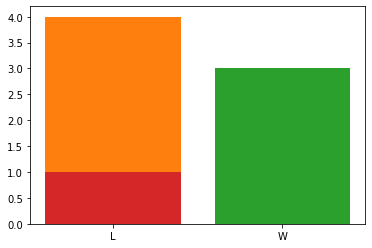

In [26]:
height1 = len(ypredict)
height2 = len(ytest)
wins_predict = []
loss_predict = []
win_count = 0
loss_count = 0
win_test = []
loss_test = []
win_count_test = 0
loss_count_test = 0

for i in ypredict:
    if i == "W":
        win_count+=1
        wins_predict.append(i)
    else:
        loss_count +=1
        loss_predict.append(i)
for j in ytest:
    if j == "W":
        win_count_test+=1
        win_test.append(j)
    else:
        loss_count_test+=1
        loss_test.append(j)

        


plt.bar(wins_predict,win_count)
plt.bar(loss_predict, loss_count)
plt.bar(win_test,win_count_test)
plt.bar(loss_test,loss_count_test)

In [27]:
print(ytest)

['W', 'W', 'L', 'W']


In [28]:
print(accuracy_k)

[]


<BarContainer object of 1 artists>

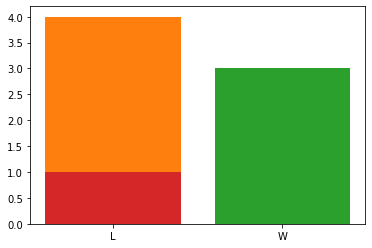

In [29]:
accuracy_k = []
accuracy_ts = []
k = [1,2,3,4,5]
test_size = [0.1,0.2,0.4,0.5,0.7]
y_predict = []
plt.bar(wins_predict,win_count)
plt.bar(loss_predict, loss_count)
plt.bar(win_test,win_count_test)
plt.bar(loss_test,loss_count_test)

## References

* “Debate Transcripts.” CPD: Debate Transcripts, www.debates.org/voter-education/debate-transcripts/.
* “Election Listing: The American Presidency Project.” Election Listing | The American Presidency Project, www.presidency.ucsb.edu/statistics/elections.
* “Data Archive.” Data Archive | The American Presidency Project, www.presidency.ucsb.edu/statistics/data.
* Approval ratings (RealClearPolitics): https://www.realclearpolitics.com/epolls/2008/president/us/general_election_mccain_vs_obama-225.html
* Approval ratings (WikiWand): https://www.wikiwand.com/en/United_States_presidential_approval_rating#/Historical_comparison